In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!tar -xvzf /content/drive/MyDrive/hw3-data-release.tar.gz -C /content/  #change into your path of dataset

train/
train/160ea5ba-0579-4e6f-b289-f612c269ca9a/
train/160ea5ba-0579-4e6f-b289-f612c269ca9a/image.tif
train/160ea5ba-0579-4e6f-b289-f612c269ca9a/class4.tif
train/03565bf2-0cc9-46a0-9ff2-0a4076865f6c/
train/03565bf2-0cc9-46a0-9ff2-0a4076865f6c/image.tif
train/03565bf2-0cc9-46a0-9ff2-0a4076865f6c/class2.tif
train/a6186101-9597-4a8f-b000-4e49ea15406c/
train/a6186101-9597-4a8f-b000-4e49ea15406c/image.tif
train/a6186101-9597-4a8f-b000-4e49ea15406c/class1.tif
train/a6186101-9597-4a8f-b000-4e49ea15406c/class2.tif
train/91637e2b-8cc0-466e-929e-6c3e3773dbf4/
train/91637e2b-8cc0-466e-929e-6c3e3773dbf4/image.tif
train/91637e2b-8cc0-466e-929e-6c3e3773dbf4/class1.tif
train/91637e2b-8cc0-466e-929e-6c3e3773dbf4/class2.tif
train/4d4443f7-8e81-447d-a2fe-18d784925e03/
train/4d4443f7-8e81-447d-a2fe-18d784925e03/image.tif
train/4d4443f7-8e81-447d-a2fe-18d784925e03/class1.tif
train/4d4443f7-8e81-447d-a2fe-18d784925e03/class2.tif
train/099c8bd8-4d6c-46b8-bb0d-85d1a636eaf1/
train/099c8bd8-4d6c-46b8-bb0d-85

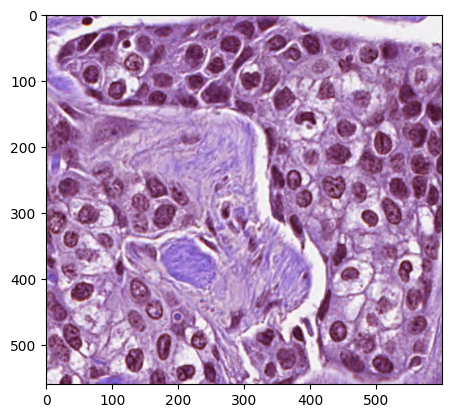

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Open the image and convert it to a NumPy array
img = Image.open('train/0088d6cd-fcbd-4037-babf-74abd3c82204/image.tif')
arr = np.array(img)

# Display the image, using 'gray' colormap if the array is 2D
plt.imshow(arr, cmap='gray' if arr.ndim == 2 else None)
plt.show()

In [ ]:
!pip install imagecodecs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 16.5 MB/s eta 0:00:00


Shape: (560, 600, 4)
Dtype: uint8
Min: 4 Max: 255


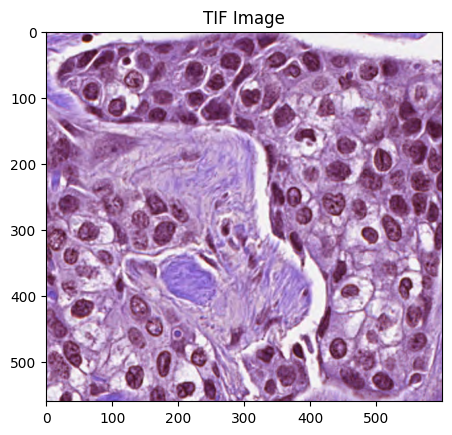

In [ ]:
import tifffile as tiff
import imagecodecs
import matplotlib.pyplot as plt

# Read the TIFF image using tifffile
img = tiff.imread('train/0088d6cd-fcbd-4037-babf-74abd3c82204/image.tif')

# Print the shape, dtype, and value range of the image
print("Shape:", img.shape)
print("Dtype:", img.dtype)
print("Min:", img.min(), "Max:", img.max())

# Display the image with a gray colormap
plt.imshow(img, cmap='gray')
plt.title("TIF Image")
plt.show()

Shape: (1024, 1024, 4)
Dtype: uint8
Min: 6 Max: 255


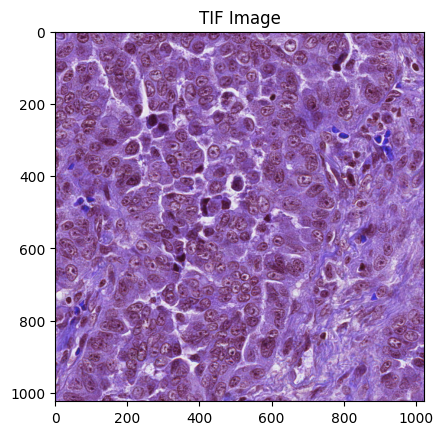

In [ ]:
import tifffile as tiff
import imagecodecs
import matplotlib.pyplot as plt

# Read the TIFF image using tifffile
img = tiff.imread('train/013c63ee-de86-4fda-b195-041a4a303b2c/image.tif')

# Print the shape, dtype, and value range of the image
print("Shape:", img.shape)
print("Dtype:", img.dtype)
print("Min:", img.min(), "Max:", img.max())

# Display the image with a gray colormap (adjust based on your image format)
plt.imshow(img, cmap='gray')
plt.title("TIF Image")
plt.show()

Shape: (560, 600)
Dtype: float64


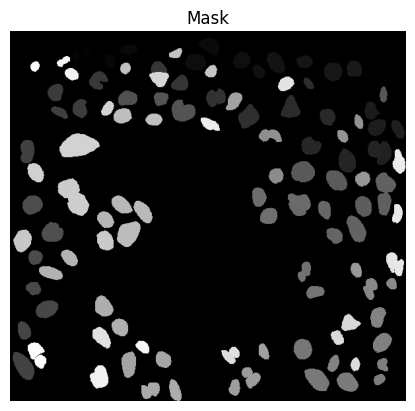

In [ ]:
mask = tiff.imread('train/0088d6cd-fcbd-4037-babf-74abd3c82204/class1.tif')
print("Shape:", mask.shape)
print("Dtype:", mask.dtype)

plt.imshow(mask, cmap='gray')
plt.title("Mask")
plt.axis('off')
plt.show()

In [ ]:
from scipy import ndimage

# Label the mask and count the number of features (cells)
labeled_mask, num_features = ndimage.label(mask)

# Print the number of detected cells
print(f"Detected {num_features} cells")

Detected 113 cells


In [ ]:
import tifffile as tiff
from scipy import ndimage
import numpy as np
from PIL import Image, ImageDraw

final_masks = []
final_labels = []

for class_id in range(1, 5):
    try:
        mask_path = f"train/0088d6cd-fcbd-4037-babf-74abd3c82204/class{class_id}.tif"
        mask = tiff.imread(mask_path)

        if mask.max() == 0:
            print(f"[Class {class_id}] Mask contains only zeros, skipping.")
            continue

        image_path = f"train/0088d6cd-fcbd-4037-babf-74abd3c82204/image.tif"
        image = Image.open(image_path).convert("RGB")
        draw = ImageDraw.Draw(image)

        labeled_mask, num = ndimage.label(mask)

        if num > 0:
            print(f"[Class {class_id}] Detected {num} instances.")
        else:
            print(f"[Class {class_id}] No instances found.")

        for inst_id in range(1, num + 1):
            instance_mask = (labeled_mask == inst_id).astype(np.uint8)
            final_masks.append(instance_mask)
            final_labels.append(class_id)

            bbox = np.where(instance_mask)
            ymin, ymax = bbox[0].min(), bbox[0].max()
            xmin, xmax = bbox[1].min(), bbox[1].max()
            area = instance_mask.sum()

            draw.rectangle([xmin, ymin, xmax, ymax], outline="green", width=2)

            print(f"    └─ Instance {inst_id}: bbox=({xmin},{ymin}) to ({xmax},{ymax}), area={area}")

        image.save(f"output_with_bbox_class{class_id}_inst{inst_id}.tif")

    except FileNotFoundError:
        print(f"[Class {class_id}] class_{class_id}.tif not found, skipping.")
        continue

[Class 1] Detected 113 instances.
    └─ Instance 1: bbox=(286,11) to (316,36), area=568
    └─ Instance 2: bbox=(167,20) to (192,35), area=318
    └─ Instance 3: bbox=(110,26) to (124,38), area=155
    └─ Instance 4: bbox=(241,26) to (260,40), area=212
    └─ Instance 5: bbox=(53,29) to (79,53), area=362
    └─ Instance 6: bbox=(93,29) to (104,46), area=177
    └─ Instance 7: bbox=(338,31) to (364,56), area=527
    └─ Instance 8: bbox=(389,32) to (416,63), area=646
    └─ Instance 9: bbox=(143,34) to (158,57), area=285
    └─ Instance 10: bbox=(265,35) to (296,59), area=653
    └─ Instance 11: bbox=(434,37) to (458,55), area=368
    └─ Instance 12: bbox=(71,38) to (90,54), area=192
    └─ Instance 13: bbox=(510,45) to (532,68), area=475
    └─ Instance 14: bbox=(31,46) to (44,61), area=168
    └─ Instance 15: bbox=(211,46) to (240,84), area=815
    └─ Instance 16: bbox=(167,48) to (182,65), area=219
    └─ Instance 17: bbox=(476,48) to (503,75), area=639
    └─ Instance 18: bbox=(295,

Shape: (560, 600, 3)


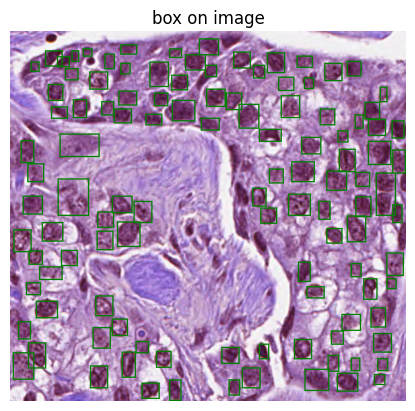

In [ ]:
import tifffile as tiff
import matplotlib.pyplot as plt

mask = tiff.imread('output_with_bbox_class1_inst113.tif')
print("Shape:", mask.shape)

# Display the mask
plt.imshow(mask, cmap='gray')
plt.title("box on image")
plt.axis('off')
plt.show()

# Preprocessing

In [ ]:
import os
import random
import tifffile as tiff
import torch
from torch.utils.data import Dataset, DataLoader, Subset
from scipy import ndimage
import numpy as np
from torchvision import transforms
from sklearn.model_selection import train_test_split
from PIL import Image, ImageDraw


def resize_image(image, target_size):
    return image.resize(target_size, Image.BILINEAR)


def resize_mask(mask, target_size):
    return mask.resize(target_size, Image.NEAREST)


class CellDataset(Dataset):
    def __init__(self, root_dir, split='train', transform=None, target_size=(512, 512)):
        self.root_dir = root_dir
        self.split = split
        self.transform = transform
        self.target_size = target_size
        self.data = self._prepare_data()

    def _prepare_data(self):
        all_data = []
        for folder in os.listdir(self.root_dir):
            folder_path = os.path.join(self.root_dir, folder)
            if os.path.isdir(folder_path):
                image_path = os.path.join(folder_path, 'image.tif')
                mask_paths = [os.path.join(folder_path, f'class{i}.tif') for i in range(1, 5)]
                all_data.append({'image': image_path, 'masks': mask_paths})

        train_data, val_data = train_test_split(all_data, test_size=0.1, random_state=42)
        return train_data if self.split == 'train' else val_data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image_info = self.data[idx]
        image = Image.open(image_info['image']).convert("RGB")
        draw = ImageDraw.Draw(image)

        masks = []
        labels = []
        boxes = []

        for class_id, mask_path in enumerate(image_info['masks'], start=1):
            if os.path.exists(mask_path):
                try:
                    mask = tiff.imread(mask_path)
                except Exception as e:
                    print(f"Error reading mask {mask_path}: {e}")
                    continue

                image = resize_image(image, self.target_size)
                mask = Image.fromarray(mask).convert("L")
                mask = resize_mask(mask, self.target_size)

                if np.max(np.array(mask)) > 0:
                    labeled_mask, num = ndimage.label(np.array(mask))
                    for inst_id in range(1, num + 1):
                        instance_mask = (labeled_mask == inst_id).astype(np.uint8)
                        masks.append(instance_mask)
                        labels.append(class_id)

                        pos = np.where(instance_mask)
                        if pos[0].size > 0 and pos[1].size > 0:
                            xmin = np.min(pos[1])
                            xmax = np.max(pos[1])
                            ymin = np.min(pos[0])
                            ymax = np.max(pos[0])
                            boxes.append([xmin, ymin, xmax, ymax])

                            draw.rectangle([xmin, ymin, xmax, ymax], outline="green", width=2)

        boxes = torch.tensor(boxes, dtype=torch.float32)
        labels = torch.tensor(labels, dtype=torch.int64)

        keep = (boxes[:, 2] > boxes[:, 0]) & (boxes[:, 3] > boxes[:, 1])
        boxes = boxes[keep]
        labels = labels[keep]

        if masks:
            masks = torch.tensor(masks, dtype=torch.uint8)
            masks = masks[keep]
        else:
            masks = np.zeros((0, self.target_size[1], self.target_size[0]), dtype=np.uint8)
            boxes = torch.zeros((0, 4), dtype=torch.float32)
            labels = torch.zeros((0,), dtype=torch.int64)

        target = {
            "boxes": boxes,
            "labels": labels,
            "masks": torch.as_tensor(masks, dtype=torch.uint8),
            "image_id": torch.tensor([idx]),
            "image_path": image_info['image']
        }

        if self.transform:
            image = self.transform(image)

        return image, target


transform = transforms.Compose([
    transforms.ToTensor(),
])

def collate_fn(batch):
    images, targets = zip(*batch)
    return list(images), list(targets)


target_size = (512, 512)
train_dataset = CellDataset(root_dir='train', split='train', transform=transform, target_size=target_size)
val_dataset = CellDataset(root_dir='train', split='val', transform=transform, target_size=target_size)

train_subset = Subset(train_dataset, indices=range(50))

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=2, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False, num_workers=2, collate_fn=collate_fn)

In [ ]:
import numpy as np

cell_counts = []

for i in range(len(train_dataset)):
    if i % 10 == 0:
        print(i)

    _, target = train_dataset[i]
    cell_counts.append(target['masks'].shape[0])

print(f"Average number of cells per image: {np.mean(cell_counts):.2f}")
print(f"Maximum number of cells: {np.max(cell_counts)}")
print(f"Minimum number of cells: {np.min(cell_counts)}")

0


<ipython-input-11-f0f99837de49>:90: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  masks = torch.tensor(masks, dtype=torch.uint8)


10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
Average number of cells per image: 129.50
Maximum number of cells: 651
Minimum number of cells: 2


In [ ]:
p75 = np.percentile(cell_counts, 70)
p80 = np.percentile(cell_counts, 80)
p90 = np.percentile(cell_counts, 90)

print(f"75% of images have < {p75:.0f} cells")
print(f"80% of images have < {p80:.0f} cells")
print(f"90% of images have < {p90:.0f} cells")

75% of images have < 208 cells
80% of images have < 254 cells
90% of images have < 317 cells


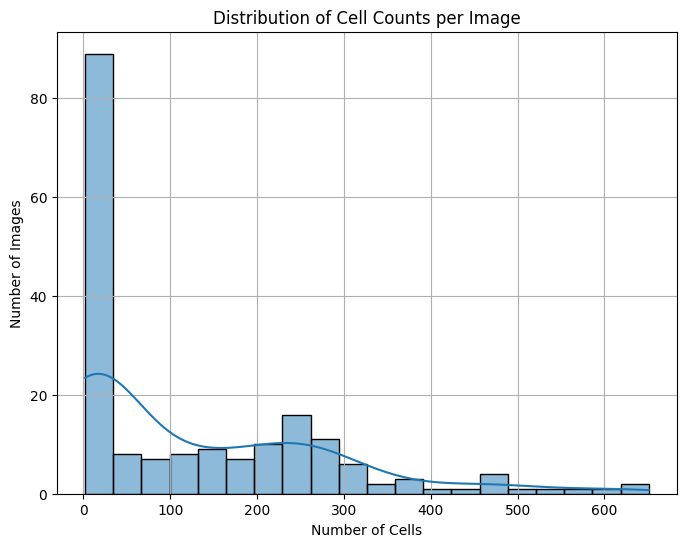

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(cell_counts, bins=20, kde=True)
plt.title("Distribution of Cell Counts per Image")
plt.xlabel("Number of Cells")
plt.ylabel("Number of Images")
plt.grid(True)
plt.show()

In [ ]:
print(f"Total samples in dataset: {len(train_dataset)}")

image, target = train_dataset[0]

print(f"Image path: {target['image_path']}")
print(f"Image tensor size: {image.size()}")
print(f"Bounding boxes: {target['boxes']}")
print(f"Labels: {target['labels']}")
print(f"Masks shape: {target['masks'].shape}")

Total samples in dataset: 188
Image path: train/aaf2d3fd-62ac-4723-9299-d951a213cca5/image.tif
Image tensor size: torch.Size([3, 512, 512])
Bounding boxes: tensor([[ 23.,   1.,  33.,  15.],
        [120.,   1., 142.,  23.],
        [246.,   1., 254.,  17.],
        ...,
        [156., 393., 163., 408.],
        [ 10., 427.,  17., 438.],
        [  8., 469.,  14., 477.]])
Labels: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
print(f"Total training samples: {len(train_loader.dataset)}")
print(f"Total validation samples: {len(val_loader.dataset)}")

Total training samples: 188
Total validation samples: 21


In [ ]:
from pycocotools import mask as maskUtils
import json
import os
import numpy as np

image_width, image_height = 512, 512

coco_gt = {
    "images": [],
    "annotations": [],
    "categories": [
        {"id": 1, "name": "class1"},
        {"id": 2, "name": "class2"},
        {"id": 3, "name": "class3"},
        {"id": 4, "name": "class4"}
    ]
}

annotation_id = 1

for idx in range(len(val_dataset)):
    img, target = val_dataset[idx]
    image_id = int(target["image_id"])
    print(f"Processing image with ID: {image_id}")

    coco_gt["images"].append({
        "id": image_id,
        "file_name": os.path.basename(target["image_path"]),
        "width": image_width,
        "height": image_height
    })

    masks = target["masks"]
    boxes = target["boxes"]
    labels = target["labels"]

    for i in range(len(labels)):
        mask = masks[i].numpy()
        rle = maskUtils.encode(np.asfortranarray(mask))
        rle["counts"] = rle["counts"].decode("utf-8")

        x_min, y_min, x_max, y_max = boxes[i].tolist()
        width = x_max - x_min
        height = y_max - y_min

        coco_gt["annotations"].append({
            "id": annotation_id,
            "image_id": image_id,
            "category_id": labels[i].item(),
            "bbox": [x_min, y_min, width, height],
            "area": width * height,
            "segmentation": rle,
            "iscrowd": 0
        })

        annotation_id += 1

with open("val_gt.json", "w") as f:
    json.dump(coco_gt, f)

Processing image with ID: 0
Processing image with ID: 1
Processing image with ID: 2
Processing image with ID: 3
Processing image with ID: 4
Processing image with ID: 5
Processing image with ID: 6
Processing image with ID: 7
Processing image with ID: 8
Processing image with ID: 9
Processing image with ID: 10
Processing image with ID: 11
Processing image with ID: 12
Processing image with ID: 13
Processing image with ID: 14
Processing image with ID: 15
Processing image with ID: 16
Processing image with ID: 17
Processing image with ID: 18
Processing image with ID: 19
Processing image with ID: 20


# Training

In [ ]:
import torch
import torchvision
from torch.utils.data import DataLoader
from torchvision.models.detection import maskrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor
from torch.optim import AdamW

model = maskrcnn_resnet50_fpn(pretrained=True)
model.train()

num_classes = 5

in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
hidden_layer = 256
model.roi_heads.mask_predictor = MaskRCNNPredictor(in_features_mask, hidden_layer, num_classes)

In [ ]:
model.roi_heads.detections_per_img

100

In [ ]:
model.roi_heads.detections_per_img = 500

In [ ]:
print(model.roi_heads.mask_predictor)

MaskRCNNPredictor(
  (conv5_mask): ConvTranspose2d(256, 256, kernel_size=(2, 2), stride=(2, 2))
  (relu): ReLU(inplace=True)
  (mask_fcn_logits): Conv2d(256, 5, kernel_size=(1, 1), stride=(1, 1))
)


In [ ]:
import torch.nn as nn


class DeepMaskHead(nn.Module):
    def __init__(self, in_channels=256, hidden_channels=128, num_classes=5):
        super().__init__()
        self.block = nn.Sequential(
            nn.Conv2d(in_channels, hidden_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(hidden_channels),
            nn.ReLU(inplace=True),
            nn.Dropout2d(p=0.2),
            nn.Conv2d(hidden_channels, hidden_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(hidden_channels),
            nn.ReLU(inplace=True),
            nn.Dropout2d(p=0.2),
            nn.ConvTranspose2d(hidden_channels, hidden_channels, kernel_size=2, stride=2),
            nn.ReLU(inplace=True)
        )
        self.final = nn.Conv2d(hidden_channels, num_classes, kernel_size=1)

    def forward(self, x):
        x = self.block(x)
        return self.final(x)

In [ ]:
model.roi_heads.mask_predictor = DeepMaskHead(
    in_channels=256,
    hidden_channels=128,
    num_classes=5
)

In [ ]:
print(model.roi_heads.mask_predictor)

DeepMaskHead(
  (block): Sequential(
    (0): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Dropout2d(p=0.2, inplace=False)
    (4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): Dropout2d(p=0.2, inplace=False)
    (8): ConvTranspose2d(128, 128, kernel_size=(2, 2), stride=(2, 2))
    (9): ReLU(inplace=True)
  )
  (final): Conv2d(128, 5, kernel_size=(1, 1), stride=(1, 1))
)


In [ ]:
def count_parameters(model):
    #Return the number of trainable parameters in the model.
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"Model's total trainable parameters: {count_parameters(model)}")

Model's total trainable parameters: 43961901


In [ ]:
optimizer = AdamW(model.parameters(), lr=1e-4)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

In [ ]:
for images, targets in train_loader:
    print(f"Batch size: {len(images)}")
    print(f"First image size: {images[0].size()}")
    print(f"First target keys: {targets[0].keys()}")
    break

Batch size: 4
First image size: torch.Size([3, 512, 512])
First target keys: dict_keys(['boxes', 'labels', 'masks', 'image_id', 'image_path'])


In [ ]:
def evaluate_model(model, val_loader, device, gt_json_path, save_pred_path='val_pred.json'):
    from pycocotools.coco import COCO
    from pycocotools.cocoeval import COCOeval
    import pycocotools.mask as mask_utils
    import numpy as np
    import json
    from tqdm import tqdm

    model.eval()
    coco_pred = []

    with torch.no_grad():
        for images, targets in tqdm(val_loader, desc="Evaluating", leave=False):
            images = [img.to(device) for img in images]
            outputs = model(images)

            for i in range(len(outputs)):
                output = outputs[i]
                target = targets[i]

                boxes = output['boxes'].cpu()
                labels = output['labels'].cpu()
                scores = output['scores'].cpu()
                masks = output['masks'].cpu()

                for j in range(len(labels)):
                    mask = (masks[j, 0] > 0.5).numpy()
                    rle = mask_utils.encode(np.asfortranarray(mask))
                    rle['counts'] = rle['counts'].decode('utf-8')

                    x_min, y_min, x_max, y_max = boxes[j].tolist()
                    width = x_max - x_min
                    height = y_max - y_min

                    coco_pred.append({
                        "image_id": int(target['image_id']),
                        "category_id": labels[j].item(),
                        "bbox": [x_min, y_min, width, height],
                        "score": scores[j].item(),
                        "segmentation": rle
                    })

    with open(save_pred_path, 'w') as f:
        json.dump(coco_pred, f)

    coco_gt = COCO(gt_json_path)
    coco_dt = coco_gt.loadRes(save_pred_path)
    coco_eval = COCOeval(coco_gt, coco_dt, iouType='segm')
    coco_eval.evaluate()
    coco_eval.accumulate()
    coco_eval.summarize()

    return coco_eval.stats

In [ ]:
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, targets in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", unit="batch"):
        images = [image.to(device) for image in images]  # Move to GPU
        targets = [{k: v.to(device) if isinstance(v, torch.Tensor) else v for k, v in t.items()} for t in targets]

        loss_dict = model(images, targets)
        losses = (
            1.0 * loss_dict['loss_classifier'] +
            1.0 * loss_dict['loss_box_reg'] +
            1.0 * loss_dict['loss_mask'] +
            1.0 * loss_dict['loss_objectness'] +
            1.0 * loss_dict['loss_rpn_box_reg']
        )

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        running_loss += losses.item()

        # Clear memory
        del images, targets, loss_dict, losses

    lr_scheduler.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}")

    stats = evaluate_model(model, val_loader, device, gt_json_path='val_gt.json')
    print(f"Validation mAP@[.5:.95]: {stats[0]:.4f}, AP50: {stats[1]:.4f}")

Epoch 1/5: 100%|██████████| 47/47 [17:39<00:00, 22.54s/batch]


Epoch [1/5], Loss: 2.0843


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.07s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=3.80s).
Accumulating evaluation results...
DONE (t=0.06s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.152
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.293
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.146
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.102
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.120
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.004
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.020
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.135
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets

Epoch 2/5: 100%|██████████| 47/47 [17:28<00:00, 22.32s/batch]


Epoch [2/5], Loss: 1.5534


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=3.81s).
Accumulating evaluation results...
DONE (t=0.06s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.237
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.413
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.275
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.119
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.226
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.006
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.033
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.219
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets

Epoch 3/5: 100%|██████████| 47/47 [17:29<00:00, 22.33s/batch]


Epoch [3/5], Loss: 1.2870


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=3.37s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.240
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.411
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.279
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.150
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.215
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.016
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.037
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.227
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets

Epoch 4/5: 100%|██████████| 47/47 [17:27<00:00, 22.28s/batch]


Epoch [4/5], Loss: 1.1251


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.22s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=3.40s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.267
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.432
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.301
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.147
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.246
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.023
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.045
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.245
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets

Epoch 5/5: 100%|██████████| 47/47 [17:30<00:00, 22.35s/batch]


Epoch [5/5], Loss: 1.0522


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=3.35s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.281
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.473
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.319
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.157
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.253
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.052
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.040
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.246
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets

In [ ]:
from torch.utils.data import DataLoader
from tqdm import tqdm  # Importing tqdm for progress bar
import pycocotools.mask as maskUtils
import numpy as np
import json

val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

coco_pred = []

model.eval()
with torch.no_grad():
    for images, targets in tqdm(val_loader, desc="Predicting"):
        images = [img.to(device) for img in images]  # Move to GPU

        outputs = model(images)

        for i in range(len(outputs)):
            output = outputs[i]
            target = targets[i]

            boxes = output['boxes'].cpu()
            labels = output['labels'].cpu()
            scores = output['scores'].cpu()
            masks = output['masks'].cpu()

            for j in range(len(labels)):
                mask = (masks[j, 0] > 0.5).numpy()
                rle = maskUtils.encode(np.asfortranarray(mask))
                rle['counts'] = rle['counts'].decode('utf-8')

                bbox = boxes[j].tolist()
                x_min, y_min, x_max, y_max = bbox
                width = x_max - x_min
                height = y_max - y_min

                coco_pred.append({
                    "image_id": int(target['image_id']),
                    "category_id": labels[j].item(),
                    "bbox": [x_min, y_min, width, height],
                    "score": scores[j].item(),
                    "segmentation": rle
                })

# Save to json
with open('val_pred.json', 'w') as f:
    json.dump(coco_pred, f)


Predicting: 100%|██████████| 6/6 [01:49<00:00, 18.27s/it]


In [ ]:
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval


coco_gt = COCO('val_gt.json')
coco_dt = coco_gt.loadRes('val_pred.json')


coco_eval = COCOeval(coco_gt, coco_dt, iouType='segm')
coco_eval.evaluate()
coco_eval.accumulate()
coco_eval.summarize()

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.24s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=4.00s).
Accumulating evaluation results...
DONE (t=0.05s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.281
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.473
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.319
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.157
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.253
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.052
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.040
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.246
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets

In [ ]:
import os
import torch
from torchvision import models, transforms
from PIL import Image
from pycocotools import mask as mask_utils
import numpy as np
import json

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

target_size = (512, 512)

transform = transforms.Compose([
    transforms.Resize(target_size, interpolation=Image.BILINEAR),
    transforms.ToTensor(),
])


def clean_for_json(obj):
    if isinstance(obj, dict):
        return {k: clean_for_json(v) for k, v in obj.items()}
    elif isinstance(obj, list):
        return [clean_for_json(v) for v in obj]
    elif isinstance(obj, np.generic):
        return obj.item()
    else:
        return obj


def predict_images_in_folder(folder_path):
    predictions_all_images = []

    if not os.path.exists(folder_path):
        print(f"Folder {folder_path} does not exist!")
        return

    with open("test_image_name_to_ids.json", 'r') as f:
        name_to_id_list = json.load(f)
        name_to_id = {entry["file_name"]: entry["id"] for entry in name_to_id_list}

    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)

        if image_path.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.tiff')):
            print(f"Processing image: {image_name}")

            image_id = name_to_id.get(image_name)
            if image_id is None:
                print(f"Could not find ID for {image_name}, skipping.")
                continue

            # === Keep original size for later restoration ===
            orig_image = Image.open(image_path).convert("RGB")
            orig_w, orig_h = orig_image.size

            # Resize and convert to tensor
            image_tensor = transform(orig_image).unsqueeze(0).to(device)

            with torch.no_grad():
                predictions = model(image_tensor)

            formatted_predictions = format_predictions(predictions, image_id, orig_size=(orig_w, orig_h))
            predictions_all_images.extend(formatted_predictions)

    return clean_for_json(predictions_all_images)


def format_predictions(predictions, image_id, orig_size):
    result = []
    boxes = predictions[0]['boxes']
    scores = predictions[0]['scores']
    labels = predictions[0]['labels']
    masks = predictions[0]['masks']

    keep = scores > 0.5

    scale_x = orig_size[0] / target_size[0]
    scale_y = orig_size[1] / target_size[1]

    for i in range(len(scores)):
        if keep[i]:
            prediction = {}
            prediction['image_id'] = image_id

            box = boxes[i].cpu().numpy()
            x_min, y_min, x_max, y_max = box

            # === Restore bbox ===
            x_min *= scale_x
            x_max *= scale_x
            y_min *= scale_y
            y_max *= scale_y
            width = x_max - x_min
            height = y_max - y_min

            prediction['bbox'] = [x_min, y_min, width, height]
            prediction['score'] = scores[i].item()
            prediction['category_id'] = labels[i].item()

            # === Restore segmentation mask ===
            mask = masks[i, 0] > 0.4
            mask_np = mask.cpu().numpy().astype(np.uint8)
            mask_pil = Image.fromarray(mask_np * 255)
            mask_orig = mask_pil.resize(orig_size, resample=Image.NEAREST)
            mask_np_rescaled = np.array(mask_orig) > 127

            rle = mask_utils.encode(np.asfortranarray(mask_np_rescaled.astype(np.uint8)))
            prediction['segmentation'] = {
                'size': mask_np_rescaled.shape,
                'counts': rle['counts'].decode('utf-8')
            }

            result.append(prediction)

    return result


# Run predictions and save the results
folder_path = "test_release"
predictions = predict_images_in_folder(folder_path)

with open("test-results.json", "w") as f:
    json.dump(predictions, f)

print("Prediction results have been saved as test-results.json")

Processing image: 2746000b-78bc-42f5-9c77-91bd5d012b9f.tif
Processing image: 5e7ad04b-b06e-4198-a063-733e7824fddf.tif
Processing image: 64321b99-230b-437c-a005-28671ff2d30c.tif
Processing image: e9660304-f3cb-4b93-bdf1-745653388f9e.tif
Processing image: c8cb7626-7423-4c1e-a81c-5ff25ea180b3.tif
Processing image: bd0cc05f-33b8-41ed-b68e-9d7719e440d3.tif
Processing image: eca9ee95-e636-4f96-9f60-c5d751750433.tif
Processing image: 89fce9d5-33b8-4ae9-ae63-5ee43e99938f.tif
Processing image: 01ce9840-ea96-495e-8fd1-696a734956af.tif
Processing image: 588dc5c8-4a99-4c47-9f80-8597ef6e4044.tif
Processing image: 39889486-0933-4fc4-bfef-13621fd99d52.tif
Processing image: e9813521-149f-4cc4-bec5-b96fc1d0f79b.tif
Processing image: 9a0001c6-450f-44e3-a80a-fd69544c425e.tif
Processing image: 361ae396-de1f-43c4-865d-01e45d02250a.tif
Processing image: 76b11ec0-965a-4cf2-9f12-f445fc10a827.tif
Processing image: 46d00689-6a3e-479b-a212-ebfa75b4c885.tif
Processing image: 41f145de-42b1-4bb8-9825-e6a002a9ee40.t

Original size of 01ce9840-ea96-495e-8fd1-696a734956af.tif: (833, 748) (height, width)


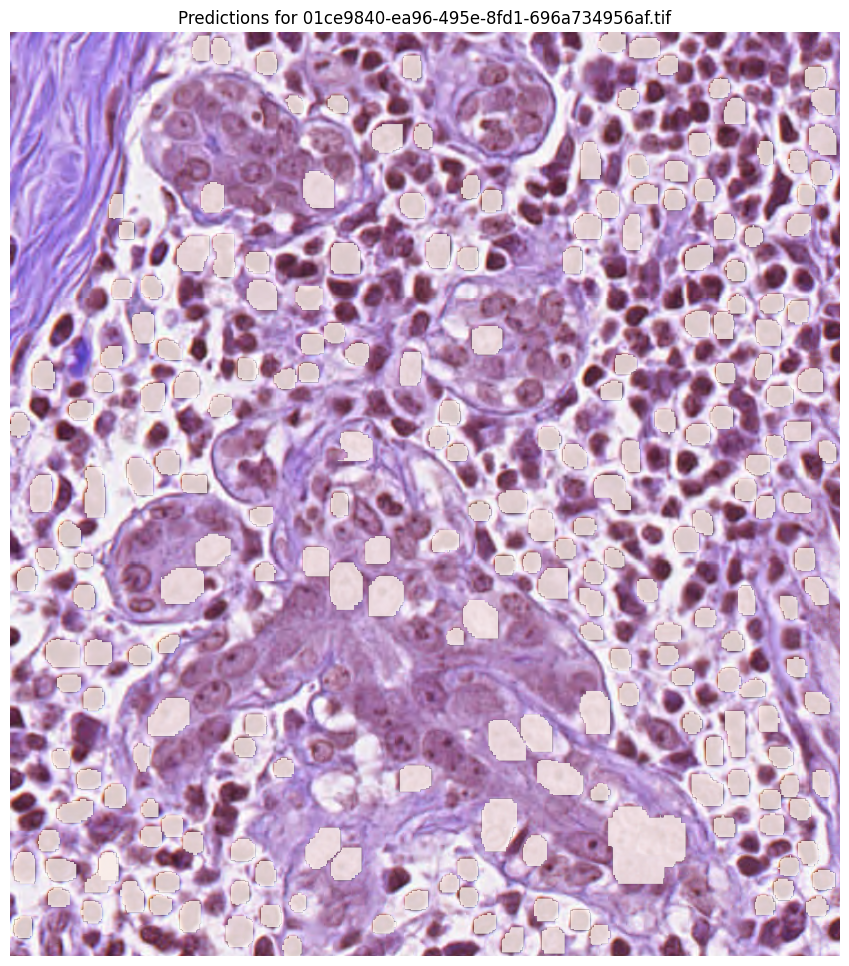

Number of boxes per category (image: 01ce9840-ea96-495e-8fd1-696a734956af.tif):
  Category 2: 210 boxes
  Category 1: 23 boxes


In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from PIL import Image
from pycocotools import mask as mask_utils


def visualize_prediction_and_count(predictions, image_folder, image_file_name):
    """
    predictions: List returned by predict_images_in_folder
    image_folder: Folder containing the original images
    image_file_name: The name of the image file to visualize
    """
    # Find predictions for the specific image
    target_preds = [pred for pred in predictions if pred['image_id'] == name_to_id[image_file_name]]

    if len(target_preds) == 0:
        print(f"Could not find predictions for {image_file_name}")
        return

    # Load the original image
    image_path = os.path.join(image_folder, image_file_name)
    image = np.array(Image.open(image_path).convert("RGB"))

    print(f"Original size of {image_file_name}: {image.shape[:2]} (height, width)")

    # Create the plot
    plt.figure(figsize=(12, 12))
    plt.imshow(image)

    category_counter = Counter()

    # Overlay all the masks
    for pred in target_preds:
        segmentation = pred['segmentation']
        size = segmentation['size']
        counts = segmentation['counts'].encode('utf-8')

        # Decode RLE to restore the mask using pycocotools
        rle = {'size': size, 'counts': counts}
        mask = mask_utils.decode(rle)

        # Overlay the mask (transparent red)
        plt.imshow(np.ma.masked_where(mask == 0, mask), cmap='Reds', alpha=0.8)

        # Count the category_id
        category_id = pred['category_id']
        category_counter[category_id] += 1

    plt.axis('off')
    plt.title(f"Predictions for {image_file_name}")
    plt.show()

    # Print category count statistics
    print(f"Number of boxes per category (image: {image_file_name}):")
    for category_id, count in category_counter.items():
        print(f"  Category {category_id}: {count} boxes")


# Assume you want to view a specific image in the test_release folder, e.g., "test_001.tif"
# Remember that name_to_id should be accessible (it may need to be moved outside)
with open("test_image_name_to_ids.json", 'r') as f:
    name_to_id_list = json.load(f)
    name_to_id = {entry["file_name"]: entry["id"] for entry in name_to_id_list}

visualize_prediction_and_count(predictions, "test_release", "01ce9840-ea96-495e-8fd1-696a734956af.tif")